In [19]:
import os
from verify.preprocessing import *
from verify.lesion_load import *

### This function preprocesses the SMATT Files (SMATT_key.txt and S-MATT.nii) for probabilistic lesion load calculation.

In [6]:
preprocess_SMATT_files('./data/')

### The next step is brain extraction (using HD-BET) for the image that is being aligned and the template image.

In [7]:
hd_bet_subject('/Users/willi3by/Desktop/21_394140_3D_Sag_T1_FSPGR.nii.gz')
hd_bet_subject('/Users/willi3by/Desktop/MNI152_T1_2009c.nii')


########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /Users/willi3by/Desktop/MNI152_T1_2009c.nii
preprocessing...
image shape after preprocessing:  (129, 153, 129)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


### After the skull is removed from the subject image and template, the next step is to align the subject image and corresponding lesion to template space.

In [8]:
warped_lesion = align_lesion_mask_to_mni('./data/', '/Users/willi3by/Desktop/21_394140_3D_Sag_T1_FSPGR_bet.nii.gz',
                                         '/Users/willi3by/Desktop/MNI152_T1_2009c_bet.nii.gz',
                                         '//Users/willi3by/Desktop/21_394140_ICH_Mask.nii.gz')

### Finally lesion load is calculated using the aligned lesion.

In [15]:
all_tract_loads = calculate_lesion_load('./data/',
                                        './data/lesion_to_mni.nii')

/var/folders/2z/35gyfjqx7437r645_d0z0l5h0000gp/T/ipykernel_26977/3925704011.py:18: RuntimeWarning:

divide by zero encountered in long_scalars

/var/folders/2z/35gyfjqx7437r645_d0z0l5h0000gp/T/ipykernel_26977/3925704011.py:18: RuntimeWarning:

invalid value encountered in double_scalars



### If interested, you can also plot the lesion loads.

NameError: name 'seaborn' is not defined

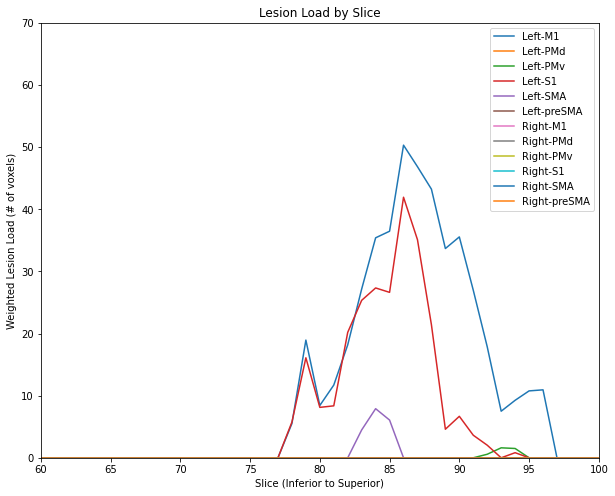

In [21]:
plot_tract_loads(all_tract_loads)

In [ ]:
lesion_load_auc = calculate_lesion_load_auc(all_tract_loads)
lesion_load_auc